# Practic examples of Systools Linear Regression Module

In [1]:
# importing
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from main.systool import data, linreg
import pandas as pd

*linreg* is a module to perform linear regression over a dataset.  On transport planning we may want to perform regression using multiple variables and choose the best combination. This module enables you to test all combinations (using **loop_model**)  and then you can choose the best one to analyse the details of the results (using **fit_model**)


### First open data
Is a good practice to check what you are reading. You can use _.head()_ to take a look on the "head" of the DataFrame

In [2]:
df_trip = data.open_file('examples_databases\input_geracao.xlsx', kwargs={'sheet_name':'VIAGENS'})
df_trip.head()

,ZONA,ATRA,PROD
0,1,34768,45430
1,2,61501,58691
2,3,25362,35433
3,4,97055,96527
4,5,35215,66098


or use _.info()_ to also check the dtypes

In [3]:
df_data = data.open_file('examples_databases\input_geracao.xlsx', kwargs={'sheet_name':'DADOS'})
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ZONAS       119 non-null    int64
 1   EMPREGOS    119 non-null    int64
 2   ENSINO      119 non-null    int64
 3   POP         119 non-null    int64
 4   DOMICILIOS  119 non-null    int64
 5   PEA         119 non-null    int64
dtypes: int64(6)
memory usage: 5.7 KB


In [4]:
df = df_trip.merge(df_data.rename(columns={'ZONAS':'ZONA'}), how='outer')
df.head()

,ZONA,ATRA,PROD,EMPREGOS,ENSINO,POP,DOMICILIOS,PEA
0,1,34768,45430,42585,327,483330,132420,473457
1,2,61501,58691,230621,697,855048,705679,141116
2,3,25362,35433,41957,264,325801,122293,91585
3,4,97055,96527,156704,673,1000086,829397,399884
4,5,35215,66098,60290,273,412396,348140,96418


## ATRACTION
### Loop for all possibilities

Perform a loop and find all possibilities that are significant
* User parameter *mask* to remove zones that you want to treat as default outliers (airports zones for example)
* *keepAll = True* returns even regressions that are not significant (with R^2 < CUT_R)

Default regressions performed with 100.0% of data


Getting combinations for all variables: 100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


6 possibilites of regression to do!
Get correlated pairs...


Droping combinations with correlated values...: 100%|██████████████████████████████████| 3/3 [00:00<00:00, 1197.35it/s]


3 non-correlated possibilities to do!


Making regressions...: 100%|█████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]

    6 regressões decentes (R² > 0.5) foram geradas
    1 regressões passaram nos testes


,x,Rsquared,intercept,covType,ZONAS,PASS_TESTS,NUM_COEF_NEGATIVO,DURBIN_WATSON,HARVEY_COLLIER,MEAN_KDE,STD_KDE,numXvars,numZones
1,[EMPREGOS],0.9302,False,nonrobust,"[70, 99, 26, 110, 27, 37, 30, 83, 72, 20, 24, ...",SIM,0,1.632420,0.329584,-943.650263,19880.458510,1,113
3,[ENSINO],0.9274,False,nonrobust,"[110, 64, 107, 116, 26, 118, 109, 56, 23, 35, ...",NOP,0,1.790375,0.006173,7217.214789,22006.776503,1,117
5,[PEA],0.9041,False,nonrobust,"[70, 41, 82, 102, 26, 78, 64, 86, 109, 108, 39...",NOP,0,2.210049,0.005619,-911.072928,17667.629190,1,115
0,[EMPREGOS],0.8125,False,nonrobust,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",NOP,0,1.254711,0.011109,1357.885894,56709.089682,1,119
2,[ENSINO],0.7933,False,nonrobust,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",NOP,0,1.430210,0.021424,31149.233609,64325.381104,1,119
4,[PEA],0.6072,False,nonrobust,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",NOP,0,1.799833,0.040190,27051.466303,99409.185750,1,119


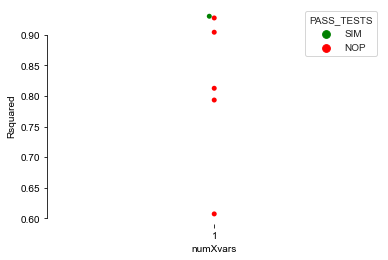

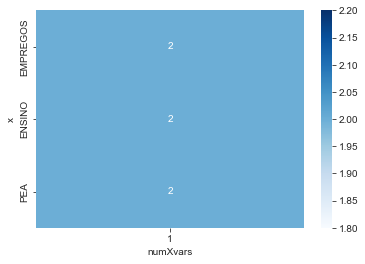

In [5]:
df_regs = linreg.loop_models(df, xcols=['EMPREGOS','ENSINO','PEA'], ycol='ATRA', mask=None, keep_all=True, cut_r=0.5, force_intercept=False)
df_regs

### Choose better regression and get a report
Use result to choose a nice regression and look all statistical results (*plot=True*) on a fancy HTML saved on *path*. 

Durbin-Watson 1.25471054292141
Durbin-Watson 1.6324201024428233


EMPREGOS    0.297597
dtype: float64

<Figure size 1920x1080 with 0 Axes>

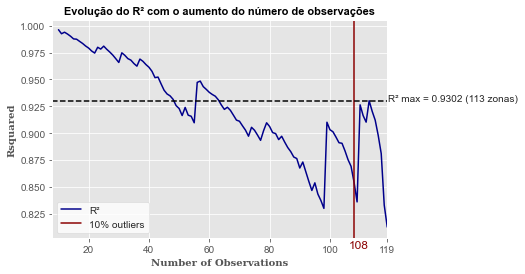

In [6]:
model, model_out = linreg.fit_model(x=df[['EMPREGOS']], y=df['ATRA'], intercept=False, plot=True, path=os.getcwd())
# model and model_out are *statsmodels 0.14.0 (+400)statsmodels.regression.linear_model.OLS* objects
# model is the compleate model, with all the zones send to fit_model
# model_out is the original model without outliers, chosen within a renge of removing upuntil 10% of records and choosing for the best one
# check out the HTML file for better understanding
model.params

## PRODUCTION
Repeate the process

Default regressions performed with 100.0% of data


Getting combinations for all variables: 100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 4798.97it/s]


6 possibilites of regression to do!
Get correlated pairs...


Droping combinations with correlated values...: 100%|███████████████████████████████████| 2/2 [00:00<00:00, 773.79it/s]


4 non-correlated possibilities to do!


Making regressions...: 100%|█████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.66it/s]


    8 regressões decentes (R² > 0.5) foram geradas
    4 regressões passaram nos testes


,x,Rsquared,intercept,covType,ZONAS,PASS_TESTS,NUM_COEF_NEGATIVO,DURBIN_WATSON,HARVEY_COLLIER,MEAN_KDE,STD_KDE,numXvars,numZones
2,[POP],0.9663,False,nonrobust,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",SIM,0,1.348399,0.255806,6738.698823,29030.687592,1,119
7,[PEA],0.9278,False,nonrobust,"[101, 54, 63, 65, 39, 56, 94, 68, 52, 38, 90, ...",SIM,0,1.426665,0.480486,666.283656,18990.481038,1,114
0,"[DOMICILIOS, PEA]",0.8680,False,nonrobust,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",SIM,0,2.446698,0.504698,12993.806674,56319.760348,2,119
6,[PEA],0.6049,False,nonrobust,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",SIM,0,1.532843,0.208392,34685.492021,107733.235332,1,119


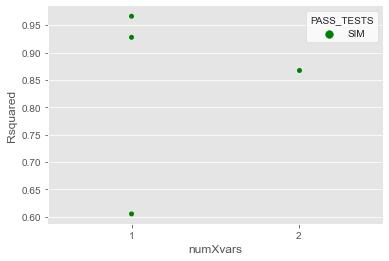

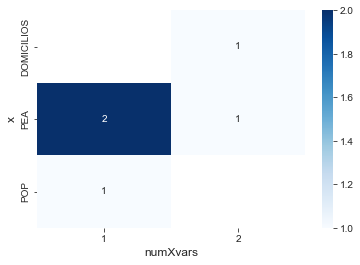

In [7]:
df_regs = linreg.loop_models(df, xcols=['POP', 'DOMICILIOS','PEA'], ycol='PROD', mask=None, keep_all=False, cut_r=0.5, force_intercept=False)
df_regs

Durbin-Watson 1.93893770416444
Durbin-Watson 1.3716775883655765


<Figure size 1920x1080 with 0 Axes>

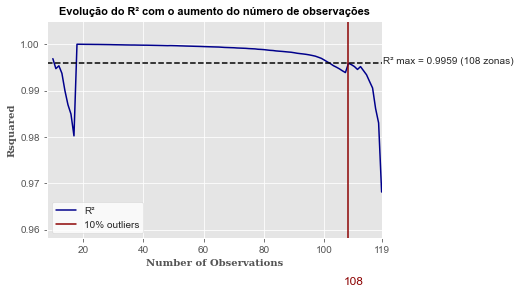

In [8]:
# you can even check a regression that is not on the result above
model, model_out = linreg.fit_model(x=df[['POP', 'DOMICILIOS', 'PEA']], y=df['PROD'], intercept=True, plot=True, path=os.getcwd())
